In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [55]:
# Load the cleaned dataset
df = pd.read_csv('final_cleaned.csv')

# Pivot the data to have pollutants as separate columns
df = df.pivot_table(values='value', index=['location', 'city', 'country', 'timestamp', 'latitude', 'longitude'], columns='pollutant').reset_index()

# Include pollutants and location, and drop rows with missing values
df = df[['latitude', 'longitude', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'co']].dropna()

In [56]:
df.drop(columns=['latitude', 'longitude'], inplace=True)

In [57]:
df.reset_index(drop=True, inplace=True)

In [58]:
df

pollutant,pm25,pm10,no2,so2,o3,co
0,11.00490,15.05950,20.29320,4.04394,45.8600,281.522
1,6.10774,7.84260,8.82229,2.00682,60.7611,256.811
2,6.68390,11.27310,3.00396,2.01421,77.3206,224.263
3,7.05426,8.37591,3.59084,2.72724,70.9611,236.714
4,6.89768,8.47832,4.42044,1.89229,69.3244,245.185
...,...,...,...,...,...,...
59334,7.62408,26.87570,31.00660,14.20000,30.4433,201.660
59335,7.76555,13.82210,9.43725,15.56760,54.1572,104.500
59336,10.57300,20.41160,9.41176,14.18960,46.3289,7.460
59337,13.52200,26.79870,23.86080,15.86660,87.1739,178.000


In [59]:
# Calculate new quantiles for binary classification
pm25_median = df['pm25'].median()
pm10_median = df['pm10'].median()

# Define a categorization function for binary classification
def categorize_air_quality_binary(row):
    if row['pm25'] > pm25_median and row['pm10'] > pm10_median:
        return 1  # High
    else:
        return 0  # Low

# Apply the function to create a binary target column
df['air_quality_binary'] = df.apply(categorize_air_quality_binary, axis=1)

# Check the distribution of the new binary target variable
print(df['air_quality_binary'].value_counts())

air_quality_binary
0    36075
1    23264
Name: count, dtype: int64


In [60]:
df

pollutant,pm25,pm10,no2,so2,o3,co,air_quality_binary
0,11.00490,15.05950,20.29320,4.04394,45.8600,281.522,0
1,6.10774,7.84260,8.82229,2.00682,60.7611,256.811,0
2,6.68390,11.27310,3.00396,2.01421,77.3206,224.263,0
3,7.05426,8.37591,3.59084,2.72724,70.9611,236.714,0
4,6.89768,8.47832,4.42044,1.89229,69.3244,245.185,0
...,...,...,...,...,...,...,...
59334,7.62408,26.87570,31.00660,14.20000,30.4433,201.660,0
59335,7.76555,13.82210,9.43725,15.56760,54.1572,104.500,0
59336,10.57300,20.41160,9.41176,14.18960,46.3289,7.460,0
59337,13.52200,26.79870,23.86080,15.86660,87.1739,178.000,1


In [61]:
# Select features and label
X = df[['pm25', 'pm10', 'no2', 'so2', 'o3', 'co']]
y = df['air_quality_binary']

In [62]:
X

pollutant,pm25,pm10,no2,so2,o3,co
0,11.00490,15.05950,20.29320,4.04394,45.8600,281.522
1,6.10774,7.84260,8.82229,2.00682,60.7611,256.811
2,6.68390,11.27310,3.00396,2.01421,77.3206,224.263
3,7.05426,8.37591,3.59084,2.72724,70.9611,236.714
4,6.89768,8.47832,4.42044,1.89229,69.3244,245.185
...,...,...,...,...,...,...
59334,7.62408,26.87570,31.00660,14.20000,30.4433,201.660
59335,7.76555,13.82210,9.43725,15.56760,54.1572,104.500
59336,10.57300,20.41160,9.41176,14.18960,46.3289,7.460
59337,13.52200,26.79870,23.86080,15.86660,87.1739,178.000


In [63]:
y

0        0
1        0
2        0
3        0
4        0
        ..
59334    0
59335    0
59336    0
59337    1
59338    0
Name: air_quality_binary, Length: 59339, dtype: int64

In [64]:
# Standardize features for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [65]:
X_train

array([[-0.94600307, -1.25123987, -0.45220754, -0.07128907,  1.56094034,
        -0.48395679],
       [-0.70628931, -0.85678238,  0.88485396, -0.57595946,  0.24577961,
        -0.48395679],
       [-0.82614619, -0.96948452,  0.69384517, -0.57595946,  1.04631223,
        -0.87543117],
       ...,
       [ 1.22094947,  0.12059873, -0.07162247, -0.43717511,  0.68853133,
        -0.0469931 ],
       [-0.58643242, -0.74408024, -0.64321632,  0.18104613,  0.21718916,
         0.6513189 ],
       [ 0.06248473, -0.46546364, -0.07464143,  2.14219526,  1.2005091 ,
         0.1990877 ]])

In [66]:
X_test

array([[ 2.39129198,  0.24685333, -0.83257126, -0.82514576, -0.86897317,
        -0.87281221],
       [-0.46657554, -0.01151633, -0.83393859, -0.82829465, -0.86770407,
        -0.87484396],
       [-0.22686177,  1.17185614, -0.83288804, -0.82829465, -0.86841883,
        -0.87511799],
       ...,
       [-0.98675441, -0.02673112, -0.83269703, -0.82825428, -0.86887628,
        -0.87472652],
       [ 0.13270887, -0.34962275, -0.83384309, -0.82804232, -0.86793279,
        -0.87523543],
       [ 0.54022228, -0.01151633, -0.8341296 , -0.82804232, -0.86807575,
        -0.87511799]])

In [67]:
y_train

14285    0
13832    0
29773    0
29360    0
26051    0
        ..
54343    1
38158    1
860      1
15795    0
56422    0
Name: air_quality_binary, Length: 41537, dtype: int64

In [68]:
y_test

16355    1
17663    0
33245    0
15669    0
34966    0
        ..
12290    0
35252    1
1992     0
49564    0
9097     1
Name: air_quality_binary, Length: 17802, dtype: int64

In [69]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_log_reg * 100)
print("Confusion Matrix:\n", conf_matrix_log_reg)

# Multinomial Naive Bayes
mnb = MultinomialNB()
X_train_mnb = X_train.copy()
X_train_mnb[X_train_mnb < 0] = 0  # Replace negative values for MultinomialNB
X_test_mnb = X_test.copy()
X_test_mnb[X_test_mnb < 0] = 0
mnb.fit(X_train_mnb, y_train)
y_pred_mnb = mnb.predict(X_test_mnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)

print("\nMultinomial Naive Bayes Results:")
print("Accuracy:", accuracy_mnb * 100)
print("Confusion Matrix:\n", conf_matrix_mnb)

Logistic Regression Results:
Accuracy: 93.24233232221098
Confusion Matrix:
 [[10346   522]
 [  681  6253]]

Multinomial Naive Bayes Results:
Accuracy: 86.43410852713178
Confusion Matrix:
 [[10005   863]
 [ 1552  5382]]


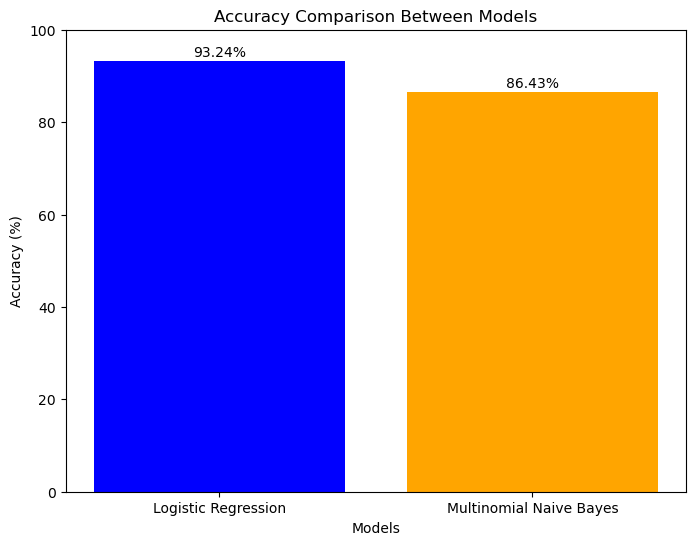

In [85]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['Logistic Regression', 'Multinomial Naive Bayes']
accuracies = [93.24, 86.43]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim(0, 100)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison Between Models')
plt.text(0, accuracies[0] + 1, f"{accuracies[0]:.2f}%", ha='center', fontsize=10)
plt.text(1, accuracies[1] + 1, f"{accuracies[1]:.2f}%", ha='center', fontsize=10)
plt.show()

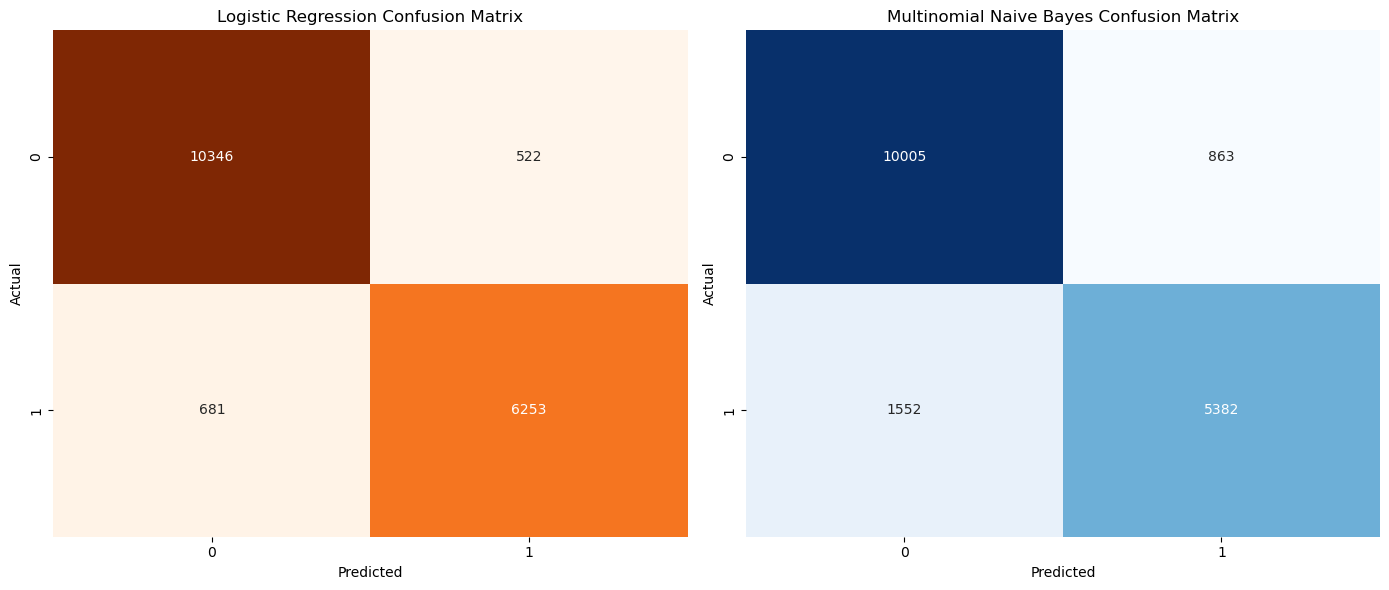

In [87]:
import seaborn as sns
import numpy as np

# Confusion matrices
conf_matrix_log_reg = np.array([[10346, 522], [681, 6253]])
conf_matrix_mnb = np.array([[10005, 863], [1552, 5382]])

# Heatmaps for Logistic Regression
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Heatmaps for Multinomial Naive Bayes
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_mnb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

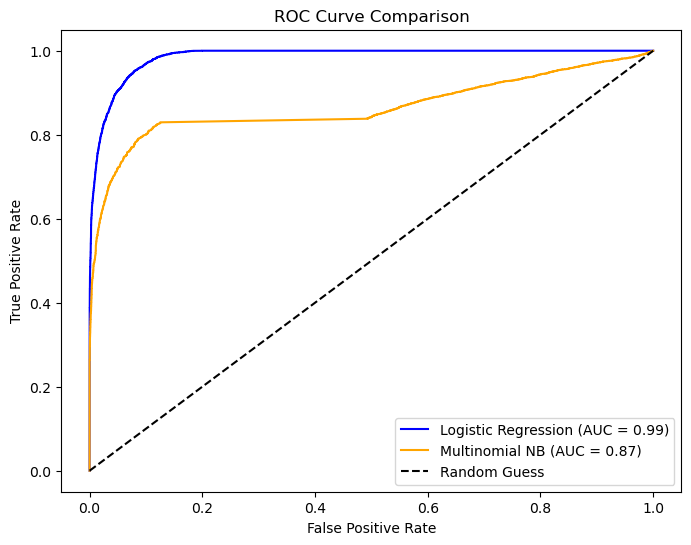

In [89]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression predictions
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log_reg)
roc_auc_log = auc(fpr_log, tpr_log)

# Multinomial Naive Bayes predictions
y_pred_prob_mnb = mnb.predict_proba(X_test_mnb)[:, 1]
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, y_pred_prob_mnb)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

# ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', color='blue')
plt.plot(fpr_mnb, tpr_mnb, label=f'Multinomial NB (AUC = {roc_auc_mnb:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()